# Template for the Titanic Machine Learning Competition on Kaggle.com

## 7 Steps of ML Projects
The 7 Steps below are universal to the majority of Machine Learning / Data Science projects, so this structure can be carried forward to other projects:
1. Frame the Problem and Ideate Potential Solutions
2. Acquire the Data
3. Exploratory Data Analysis (EDA)
4. Data Wrangling
5. Select and Train an ML Algorithm Model
6. Evaluate Results and Fine-Tune Your Model
7. Launch, Monitor, and Maintain Your System

# Step 1: Frame The Problem and Ideate Potential Solutions

## Project Overview

### Description:
👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the [Join Competition button](https://www.kaggle.com/account/login?returnUrl=%2Fc%2Ftitanic) to create an account and gain access to the [competition data](https://www.kaggle.com/c/titanic/data). Then check out [Alexis Cook’s Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial) that walks you through step by step how to make your first submission!

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Full Description

Read the full description on [kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

---

## Ideate Potential Solutions

For this project, the goal is relatively simple: predict whether a passenger on the Titanic survived based on the other data provided for that passenger.  The survival condition is already known, which means that we will need to use supervised learning methods for this project.  

Examples of supervised learning ML algorithms are:
- Linear Regression
- Logistic Regression
- k-Nearest Neighbors
- Support Vector Machines (SVM)
- Decision Trees and Random Forests
- Neural Networks

Since survival is a binary result (survived/died), a good initial approach would be to use Logistic Regression, which calculates survival rate between 0 and 1 (died vs survived) using the sigmoid function.

We could also consider using ensemble learning methods like Decision Trees and Random Forests.  A Neural Network would also be a viable option for future iteration of this project.

Once we have explored the dataset further, the optimal approach will become more apparent, so for now we will set the final decision on selecting an ML algorithm aside until we reach step 5.

# Step 2: Acquire the Data

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# install missingno - a useful tool for EDA and data cleaning
!pip install -q  missingno

In [0]:
import missingno as ms

## Download the DataSets

In [0]:
# Check the working directory
!pwd

#### Download the training dataset which we will use for EDA and to train the ML algorithm in steps 3-5

In [0]:
import os.path    # this is used to check if the files have been downloaded yet

In [0]:
if (os.path.isfile('Titanic_Train.csv') ):
  print("Skipping...file already downloaded")
else:
  !wget -q "https://www.dropbox.com/s/l81qx65hp5v0uhz/Titanic_Train.csv"

#### Download the challenge dataset which is the final data we will predict survival rates on.  But since it also has useful info about the full combined dataset, upload it now and use it to assist with EDA and Data Wrangling

In [0]:
if (os.path.isfile('Titanic_Challenge.csv') ):
  print("Skipping...file already downloaded")
else:
  !wget -q "https://www.dropbox.com/s/ao1z8udj2j6zxqm/Titanic_Challenge.csv"

In [0]:
# List the files in the working directory to make sure the files were downloaded
!ls -l

In [0]:
# load the training data into a Pandas dataframe
train = pd.read_csv('Titanic_Train.csv')

In [0]:
# Look at the first few records to make sure the data was loaded properly
train.head(3)

In [0]:
# load the challenge data into a Pandas dataframe
challenge = pd.read_csv('Titanic_Challenge.csv')

In [0]:
# Look at the last few records to make sure the data was loaded properly
challenge.tail(3)

Note that the "Survived" column is missing from the challenge dataset, since that is what we will be predicting.

In [0]:
# set the PassengerId as the index since it is unique the dataset
train.set_index('PassengerId', inplace=True)
challenge.set_index('PassengerId', inplace=True)
train.head(3)

In [0]:
# create a combined dataset to assist with EDA and understanding the full dataset
combined = pd.concat([train, challenge], axis=0, sort=False)
combined.head(3)

In [0]:
combined.tail(3)

### First submission to Kaggle.com (benchmark)

Kaggle provides a pre-made submission file that predicts survival simply based on gender (male vs female).  This is a perfect way to test out the submission process on Kaggle.com, and to set a benchmark.  We can do better than just predicting survival by gender, right?  Consider it a challenge.

#### Download the gender submission test data

#### Go to the [Kaggle Titanic Data web page](https://www.kaggle.com/c/titanic/data), find the Data Sources section, click on gender_submission, then click the download button to the right of the file name.  

Alternatively, you can run the code block below which will automatically download the file to your computer, but I recommend downloading the file from Kaggle so you can get familiar with the website.

In [0]:
if (os.path.isfile('gender_submission.csv') ):
  print("Skipping...file already downloaded")
else:
  !wget -q "https://www.dropbox.com/s/rsiv1oy4dffslvn/gender_submission.csv"

In [0]:
from google.colab import files
files.download('gender_submission.csv') 

#### It's time to submit!  Go to the [Kaggle Titanic Data web page](https://www.kaggle.com/c/titanic/data) and click the `Submit Predictions` blue button in the upper right corner.  Then upload the `gender_submission.csv` file you downloaded.

Once you submit, it should tell you your score (between 0 and 100) like in the screenshot below.

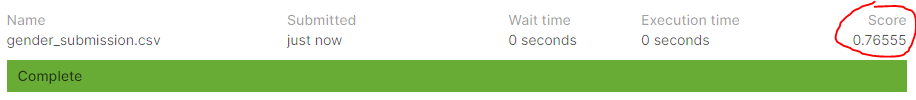


76.5% is surprisingly good for a wild ass guess!  Let's see if we can improve on that with more sophisticated methods.  Now we'll begin diving into the training dataset with some EDA.

# Step 3: Exploratory Data Analysis (EDA)

## Inital examination of the dataset

#### 3-A) What is the data type of `train`

#### 3-B) What is the shape of `train` (rows and column counts)

#### 3-C) run .info() on `train`

#### 3-D) run .describe() on `train`

#### 3-E) How many null values are within each column of `train`

It looks like we have missing values in the Age, Cabin, and Embarked column that will need to be cleaned up and either dropped completely, or filled in with best estimates in order to use this data to properly train the ML algorithm.

#### 3-F) How many null values within each column of the `combined` dataset

#### 3-G) Calculate the percentages of missing values for each column of the `combined` dataset

#### 3-H) Perform an Analysis of the data and what may need to be cleaned later.  Note that ML algorithms like Logistic Regression do not work well with missing data, or with non-numerical data, so that will need to be wrangled / cleaned / prepared in step 3.

## Visualization of the data

#### 3-I) Use ms.matrix() from missingno to visualize the missing data

In [0]:
# set the style for Seaborn charts
sns.set_style('whitegrid')

#### 3-J) Use seaborn (sns) to plot a chart with 2 columns: died or survived (0 or 1)
*hint: sns.countplot*

#### 3-K) Use seaborn to plot a chart of survived vs. died, broken down by male vs female
*hint: sns.countplot with hue='Sex'*

#### 3-L) Use seaborn to plot a chart of survived vs died, broken down by Pclass
*hint: sns.countplot with hue='Pclass'*

#### 3-M) Use seaborn to plot a distribution of the amounts in `Fare`
*hint: sns.distplot*

#### 3-N) Plot a histogram (using any method you like) of the data in `Fare`

#### 3-O) Calculate the correlation of each feature (column) vs. the other features (columns)
*hint: .corr()*

#### 3-P) Use seaborn to plot a heatmap of the correlation data
*hint: sns.heatmap*

#### 3-Q) Plot a histogram of the `Age` data

#### 3-R) Use Seaborn to create a boxplot of the `Age` data broken into the 3 `Pclass` columns
*hint: sns.boxplot(x='Pclass', y=....)*

#### 3-S) Use Seaborn to create a swarmplot of the `Age` data broken down into the 3 `Pclass` columns

#### What insights do the above charts provide?

# Step 4: Data Wrangling

## Data Cleaning

Re-examine the train dataset for missing values that need to be cleaned

#### 4-A) Refresh your memory by running .info() on the `train` data and also get a could of the number of null values in each column.  This will make it easy for quick reference throughout section 4

#### 4-B) Look at the data in the `Cabin` column to see if the unique values show any useful grouping of data

#### 4-C) Nothing useful so drop the `Cabin` column from the train Dataset

#### 4-D) Recall that `Embarked` only has 2 records with missing data.  Drop those 2 rows from the `train` dataset and run a new .info() to make sure it is properly reflected on the `train` dataset.

Now all that's left is the Age column.  If this is your first time doing this project, simply fill in the blanks with the average age of all passengers.  In a future run, are there any other ways you can fill in the average age for the passengers? (hint: look at the visualizaions above)

#### 4-E) Calculate the average `Age` of the `combined` dataset

#### 4-F) Use this average age to fill in any `NaN` values in the `train` dataset

#### 4-G) That should take care of all the missing values.  Run a fresh .info() and ms.matrix() to ensure all missing values are handled.

Now all the missing data has been taken care of.  The next step is to get any data with a type of 'Object' (e.g. Text or Categorical data) to a numeric value in order for them to be properly utilized by the ML algorithm

## Converting Categorical Features 

We'll need to convert categorical features to numerical variables so that our ML algorithm can use those values as inputs.
Current Non-numerical (object) data:
- Name
- Sex
- Ticket
- Embarked

### Name

#### 4-H) Look at the count of unique values in Ticket to see if it has any data useful to predict survival

#### 4-I) Nothing jumps out as useful here.  Drop it.  
*For a future project, consider if any titles could be used in the future (Miss vs. Mrs., any nobility titles like Sir?)*

### Sex

#### 4-K) Use Pandas `get_dummies` feature to convert sex of 'male' or 'female' into simplified male 0 or 1 (no or yes)


#### 4-L) Since it can only be a 0 or a 1, we don't need both male and female columns in this case.  Let's isolate it to just the male column

#### 4-M) Replace the existing `Sex` column in the `train` dataset with the new `male` column in the `sex` data

### Ticket

#### 4-N) Look at the count of unique values in Ticket to see if it has any data useful to predict survival

#### 4-O) Nothing useful.  Drop it

### Embarked

#### 4-P) Look at the count of unique values in Embarked to see if it has any data useful to predict survival

#### 4-Q) Similar to the `Sex` column above, use pandas `get_dummies` function to separate Embarked into 3 separate columns of binary data (0 or 1)

#### 4-R) Drop the old Embarked column

#### 4-S) Add the new C, Q, S columns

#### 4-T) Run `.info()` on the training dataset to ensure all features are now numerical and no objects remain.  Then run .describe() to get a feel for the average values and distribution of data

# Step 5: Select and Train an ML Algorithm Model

For steps 5 and 6, simply follow along by reading the code, and running each cell one by one. You should aim to understand the overall picture of what's going on, even if the inner workings of the algorithm is a black box at the moment.

## Building a Logistic Regression model

#### Split the data between dependent (X) and independent (y) variables.  y is what we are solving for

In [0]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [0]:
y.shape

#### Import train_test_split from Sci Kit Learn.  This takes our training data and separates it into 2 pieces in order to avoid perfectly fitting the algorithm to the data.  Typically around 70%-90% of the data is used to train, and 10%-30% of the data is used to test.  
`test_size` of 0.20 means 20% of the data is reserved for testing.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.20, 
                                                    random_state=42)

In [0]:
X_test.shape

In [0]:
len(y_test)

In [0]:
# check what % of the original y dataset is allocated to y_test
len(y_test) / len(y) * 100

In [0]:
X.describe()

In [0]:
X_train.describe()

In [0]:
y_train.describe()

#### Import the ML Algorithm

In [0]:
from sklearn.linear_model import LogisticRegression

#### Build and Train the ML Algorithm

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) # this is where training happens

In [0]:
# Increase Max Iterations from 100 (default) to 1000
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train) # this is where training happens

#### Predict survival on the first 5 to see if the model is somewhat accurate

In [0]:
predict =  logmodel.predict(X_test)
predict[:5]

In [0]:
y_test[:5]

# Step 6: Evaluate Results and Fine-Tune Your Model

## Evaluate the Feature Weights

#### Get the y intercept of the model.  This is the baseline survival rate when setting aside all other features

In [0]:
logmodel.intercept_

#### Get the weights (coefficients) for each of the features.  The numbers below represent how much impact each feature (column) has on the survival rate.

In [0]:
coef = logmodel.coef_
coef

#### Combine the feature labels with the feature weights (coefficients) to determine which had the largest impact

In [0]:
# flatten out the nested weights array into a list
coef = list(coef[0])
coef

In [0]:
# Get the columns we're going to match with the weights
features = X_test.columns
features

In [0]:
weights = list(zip(features, coef))
weights = pd.DataFrame(weights)
weights.columns = ['Feature', 'Weight']
weights.set_index('Feature', inplace=True)
weights.sort_values(by='Weight', inplace=True)
weights

#### Analysis

As the weights show, Sex (male vs female) had the largest impact on survival rate on the Titanic.  Which makes sense because of the 'women and children first' mentality.  

The 2nd largest impact on survival was Pclass, which also passes the logic test because higher numbers in the class category (3rd class), are less wealthy / paid for a less expensive ticket, and less likely to be catered to than the wealthy 1st class.  

The other features seem to have less of an impact compared to these top two

## Evaluate the Robustness of the ML Model

There are a number of ways to evaluate the effectiveness of an ML algorithm.  Popular tests include:
- Confusion Matrix
- Precision Score
- Recall score
- f1 Score
- Classification Report (combines all the above together)

#### Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

## Confusion Matrix

True positive   |	False positive,  
________________|________________  
                |                  
False negative  |	True negative    

In [0]:
print(confusion_matrix(y_test, predict))

#### Accuracy Score

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict))

#### Precision Score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [0]:
from sklearn.metrics import precision_score

In [0]:
print(precision_score(y_test,predict))

#### Recall score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [0]:
from sklearn.metrics import recall_score

In [0]:
print(recall_score(y_test,predict))

#### f1_score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
                F1 = 2 \* (precision \* recall) / (precision + recall)

In [0]:
from sklearn.metrics import f1_score

In [0]:
print(f1_score(y_test,predict))

To get all the above metrics at one go, use the following function:

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,predict))

# Step 7: Launch, Monitor, and Maintain Your System

## Prediction on Challenge Data From Kaggle

## Step 7-2: Acquire the Challenge Data

Recall that we already downloaded this data in step 2, under the dataframe named `challenge`.  Refresh ourselves here by looking at the data.  

*Note that Kaggle calls this dataset `test` but it was renamed to `challenge` to avoid confusion with the train/test split in previous steps.*

## Step 7-3: EDA

#### 7-3A) Run ms.matrix and .info() on the challenge dataset

## Step 7-4: Data Wrangling

We will need to perform the same data wrangling on the challenge data that we did previously on the train data.

#### Data Wrangling to be completed:
- Drop any columns that cannot be converted to numeric (Name, Ticket)
- Fill or drop missing values (Age, Fare, Cabin)
- Convert categorical values to numerical (Sex, Embarked)


#### 7-4A) Drop any columns that cannot be converted to numeric (Name, Ticket)

#### 7-4B) Fill or drop missing values (Age, Fare, Cabin)

##### Cabin

##### Fare

##### Age

#### 7-4C) Convert categorical values to numerical (Sex, Embarked)

##### Sex

##### Embarked

#### 7-4D) All data should be cleaned up and changed to numerical now.  Run .info() and .describe() to verify and get a feel for the data.

## Step 7-5: Apply the ML Model We Trained in Step 5

As with step 5, just follow along with this step, getting a high level understanding of the process, with the understanding to dive into the details in the future.

In [0]:
predict_challenge=logmodel.predict(challenge)

In [0]:
predict_challenge

In [0]:
predictdf=pd.DataFrame(predict_challenge,columns=['Survived'])
predictdf.head()

In [0]:
predictdf['PassengerId'] = challenge.index
predictdf.head()

In [0]:
# Reorder the columns so that PassengerId is first
predictdf = predictdf[['PassengerId', 'Survived']]
predictdf.head()

In [0]:
# Create a csv file from the predictdf dataframe and name it `results.csv`
predictdf.to_csv('result.csv',index=False)

In [0]:
# download the `results.csv` file to your computer
from google.colab import files
files.download('result.csv') 

## Step 7-Final: Submit the Results to Kaggle.com

#### Submit the `results` file to https://www.kaggle.com/c/titanic and see your score

## CONGRATS ON COMPLETING YOUR FIRST MACHINE LEARNING KAGGLE COMPETITION!!
The first of many to come

### Final Considerations:
- Was your score better or worse than the original benchmark?
- Is there anything you could do differently in the data wrangling to potentially improve results?
- Play around with the Logistic Regression algorithm settings from step 5 to see if you can improve the forecasting ability
- Get more familiar with the ML algorithm evaluation tests in step 6 (e.g. confusion matrix)
- For a new challenge, try copying this notebook, and in step 5 swap out the Logistic Regression ML algorithm for Random Forest, which uses multiple methods combined and typically improves prediction results vs. a simple logistic regression.
- For an even more advanced challenge down the line, copy the notebook and replace the ML algorithm in step 5 with a Neural Network.
- But before moving on to a new ML algorithm, I recommend you continue to play around with this existing Logistic Regression notebook, to see if improvements to your data wrangling or logistic regression settings improve your results.